In [63]:
#!pip install tensorflow
#!pip install keras

In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dense ,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [65]:
%matplotlib inline

In [66]:
df = pd.read_csv('Chad.csv')

In [67]:
df.head()
df.shape

(3914, 6)

In [68]:
training_set = df.iloc[0:3000,1:2].values
testing_set = df.iloc[3000:-1,1:2].values

In [69]:
training_set.shape,testing_set.shape

((3000, 1), (913, 1))

In [70]:
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
scaled_train_dataset = scaler.fit_transform(training_set)

In [72]:
scaled_train_dataset

array([[0.95326167],
       [0.94291247],
       [0.92488482],
       ...,
       [0.307171  ],
       [0.30333178],
       [0.30293116]])

In [73]:
X_train=[]
y_train=[]
for i in range(60,scaled_train_dataset.shape[0]):
    X_train.append(scaled_train_dataset[i-60:i,0])
    y_train.append(scaled_train_dataset[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [74]:
X_train.shape,y_train.shape

((2940, 60), (2940,))

In [75]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [76]:
X_train.shape

(2940, 60, 1)

In [78]:
reg = Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [79]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
92/92 [==============================] - 13s 77ms/step - loss: 0.0096
Epoch 2/10
92/92 [==============================] - 8s 90ms/step - loss: 0.0030
Epoch 3/10
92/92 [==============================] - 8s 89ms/step - loss: 0.0028
Epoch 4/10
92/92 [==============================] - 9s 97ms/step - loss: 0.0024
Epoch 5/10
92/92 [==============================] - 9s 97ms/step - loss: 0.0022
Epoch 6/10
92/92 [==============================] - 9s 97ms/step - loss: 0.0021
Epoch 7/10
92/92 [==============================] - 9s 96ms/step - loss: 0.0017
Epoch 8/10
92/92 [==============================] - 9s 95ms/step - loss: 0.0020
Epoch 9/10
92/92 [==============================] - 9s 95ms/step - loss: 0.0016
Epoch 10/10
92/92 [==============================] - 9s 96ms/step - loss: 0.0015


In [80]:
scaled_test_dataset = scaler.fit_transform(testing_set)

In [81]:
X_test=[]
y_test=[]
for i in range(60,scaled_test_dataset.shape[0]):
    X_test.append(scaled_test_dataset[i-60:i,0])
    y_test.append(scaled_test_dataset[i,0])
X_test = np.array(X_test)
y_train = np.array(y_test)

In [82]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [83]:
y_pred=reg.predict(X_test)

In [86]:
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))

R2 Score: 84.22%


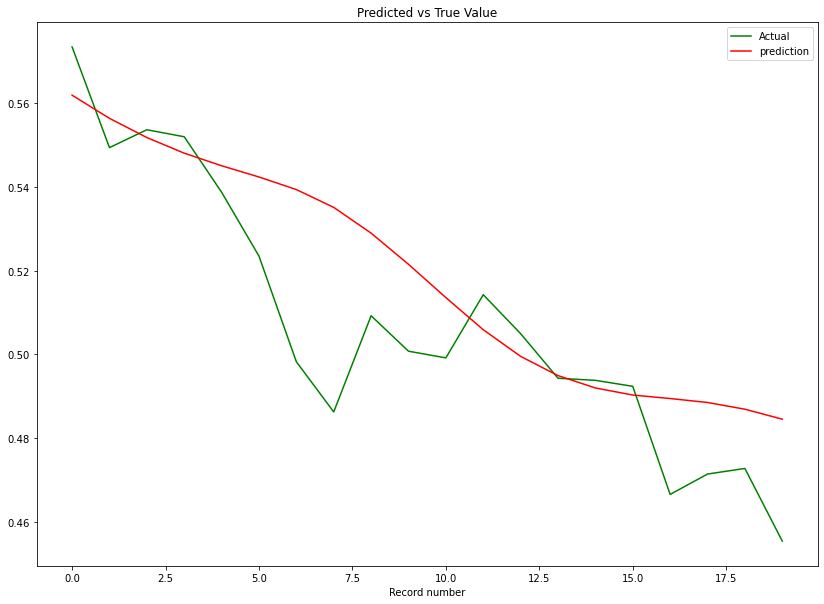

In [88]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),reg.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

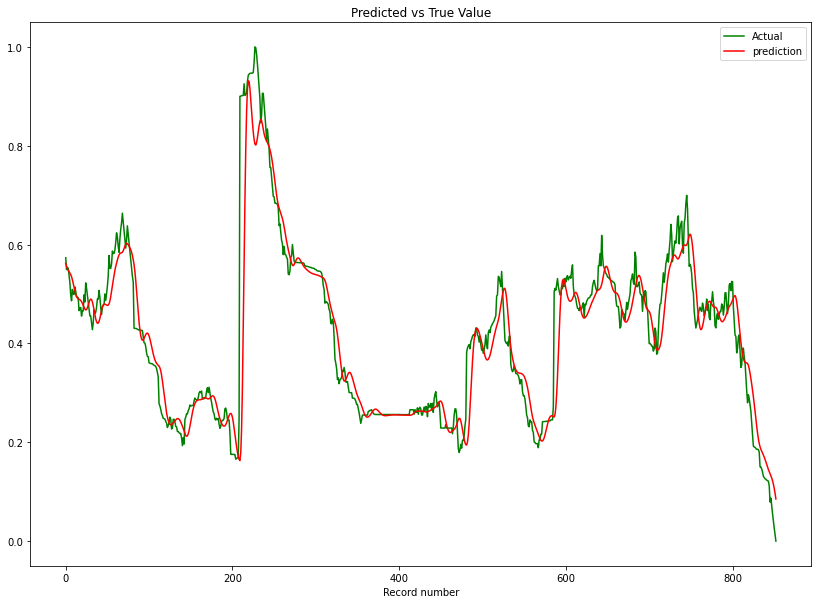

In [92]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(X_test)),reg.predict(X_test), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()